In [1]:
try:
    import cv2
except ImportError:
    print "You must have OpenCV installed"
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
#check the OpenCV version
try:
    v=cv2.__version__
    assert (tuple(map(int,v.split(".")))>(2,4,3))
except (AssertionError, ValueError):
    print "Install newer version of OpenCV than 2.4.3, i.e from 2.4.4"
    exit(1)

In [3]:
def showfig(image, ucmap):
    #There is a difference in pixel ordering in OpenCV and Matplotlib.
    #OpenCV follows BGR order, while matplotlib follows RGB order.
    if len(image.shape)==3 :
        b,g,r = cv2.split(image)       # get b,g,r
        image = cv2.merge([r,g,b])     # switch it to rgb
    imgplot=plt.imshow(image, ucmap)
    imgplot.axes.get_xaxis().set_visible(False)
    imgplot.axes.get_yaxis().set_visible(False)

In [4]:
#Plate Detection

In [5]:
plt.rcParams['figure.figsize'] = 10, 10 

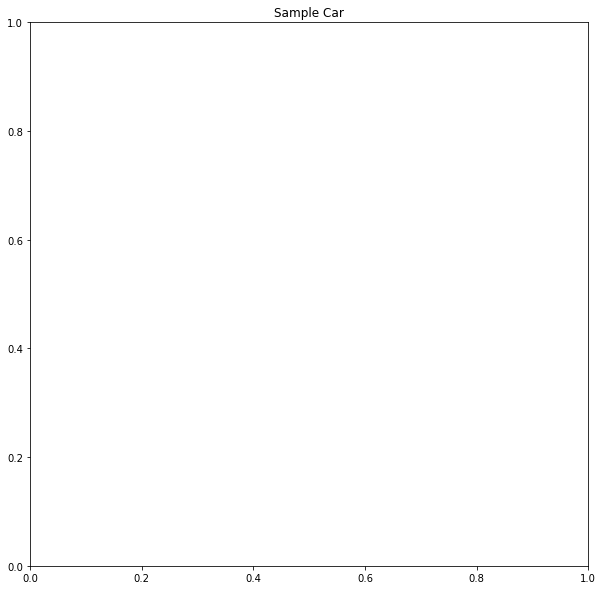

In [6]:
plt.title('Sample Car')
image_path="car1.jpg"
carsample=cv2.imread(image_path)

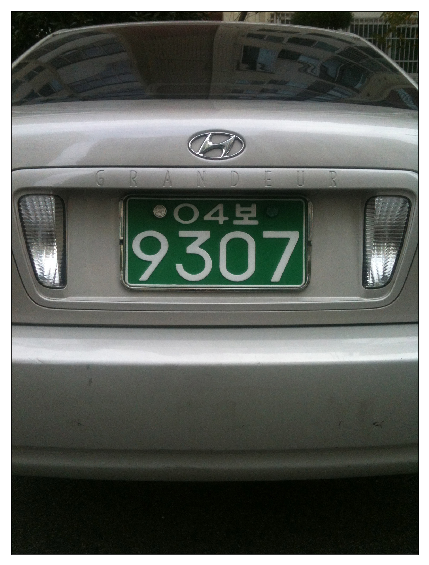

In [7]:
showfig(carsample,None)

In [8]:
plt.show()

In [9]:
#converting to grayscale

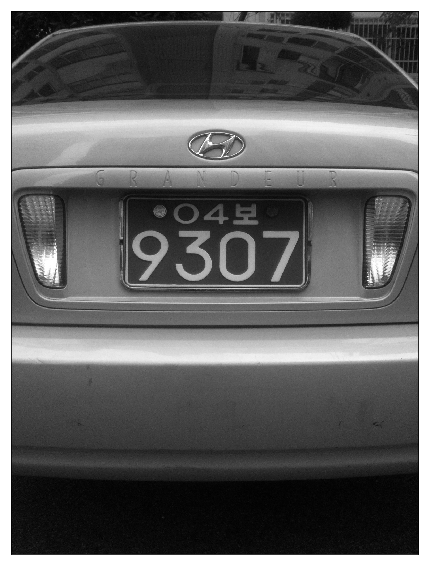

In [10]:
gray_carsample=cv2.cvtColor(carsample, cv2.COLOR_BGR2GRAY)
showfig(gray_carsample, plt.get_cmap('gray'))

In [11]:
plt.show()

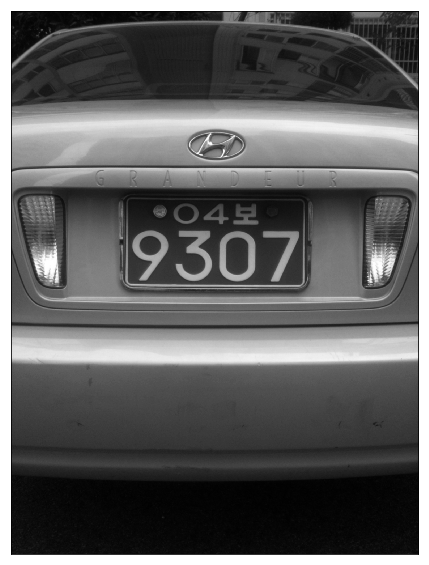

In [12]:

# blur the image
blur=cv2.GaussianBlur(gray_carsample,(5,5),0)
showfig(blur, plt.get_cmap('gray'))

In [13]:
plt.show()

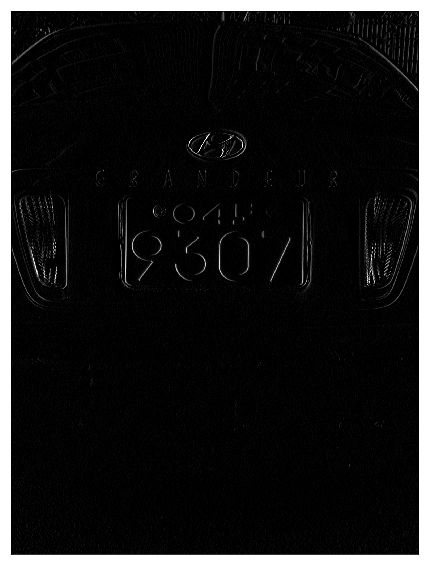

In [14]:
# find the sobel gradient. use the kernel size to be 3
sobelx=cv2.Sobel(blur, cv2.CV_8U, 1, 0, ksize=3)
showfig(sobelx, plt.get_cmap('gray'))

In [15]:
plt.show()

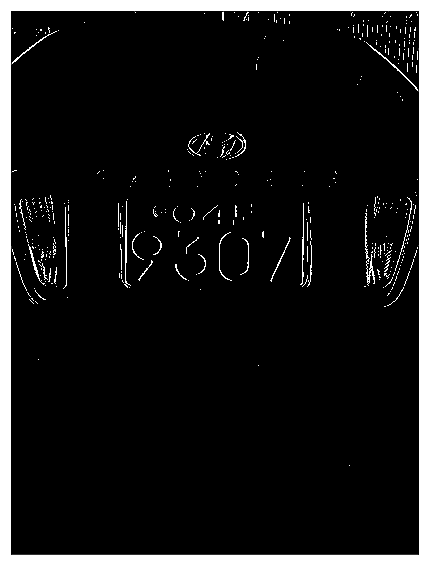

In [16]:
#Otsu thresholding
_,th2=cv2.threshold(sobelx, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
showfig(th2, plt.get_cmap('gray'))

In [17]:
plt.show()

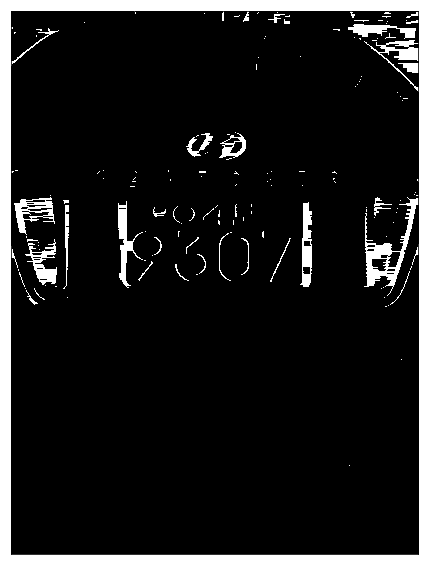

In [18]:
#Morphological Closing
se=cv2.getStructuringElement(cv2.MORPH_RECT,(23,2))
closing=cv2.morphologyEx(th2, cv2.MORPH_CLOSE, se)
showfig(closing, plt.get_cmap('gray'))

In [19]:
plt.show()

In [20]:
image, contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
for cnt in contours:
    rect=cv2.minAreaRect(cnt)  
    box=cv2.cv.BoxPoints(rect) 
    box=np.int0(box)  
    cv2.drawContours(carsample, [box], 0, (0,255,0),2)
showfig(carsample, None)

In [ ]:
#validate a contour. We validate by estimating a rough area and aspect ratio check.
def validate(cnt):    
    rect=cv2.minAreaRect(cnt)  
    box=cv2.cv.BoxPoints(rect) 
    box=np.int0(box)  
    output=False
    width=rect[1][0]
    height=rect[1][1]
    if ((width!=0) & (height!=0)):
        if (((height/width>3) & (height>width)) | ((width/height>3) & (width>height))):
            if((height*width<16000) & (height*width>3000)): 
                output=True
    return output

In [ ]:
for cnt in contours:
    rect=cv2.minAreaRect(cnt)  
    box=cv2.cv.BoxPoints(rect) 
    box=np.int0(box)  
    cv2.drawContours(carsample, [box], 0, (0,255,0),2)
showfig(carsample, None)